In [5]:
import pandas as pd
import ast
import numpy as np

from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [7]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


<Axes: xlabel='job_skills'>

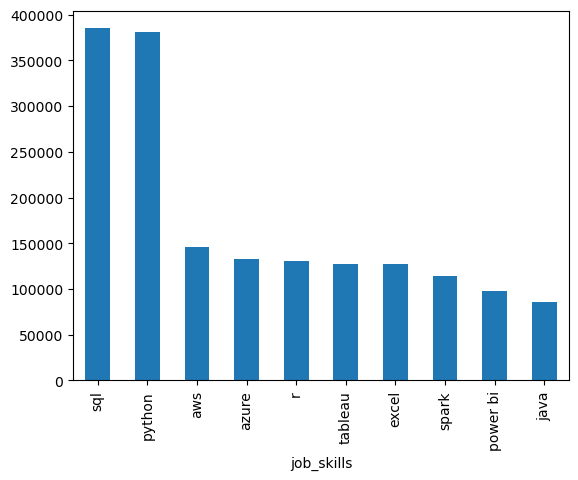

In [22]:
df_exploded = df.explode('job_skills')

df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [ ]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [ ]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending= False)
df_skills_count.head(10)

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [41]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending= False)
df_skills_count.head(10)



,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
494,Data Analyst,excel,66860
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
1070,Data Scientist,r,59566
590,Data Analyst,python,57190


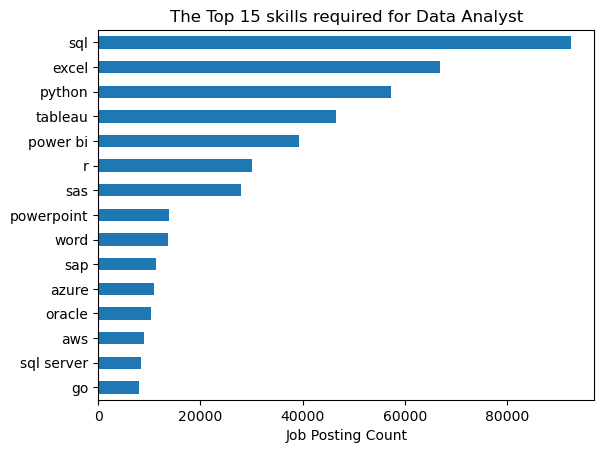

In [46]:
job_title = 'Data Analyst'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')
plt.gca().invert_yaxis()
plt.title(f'The Top {top_skills} skills required for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

## Practice Problems

1. Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column. NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
2. Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
3. Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

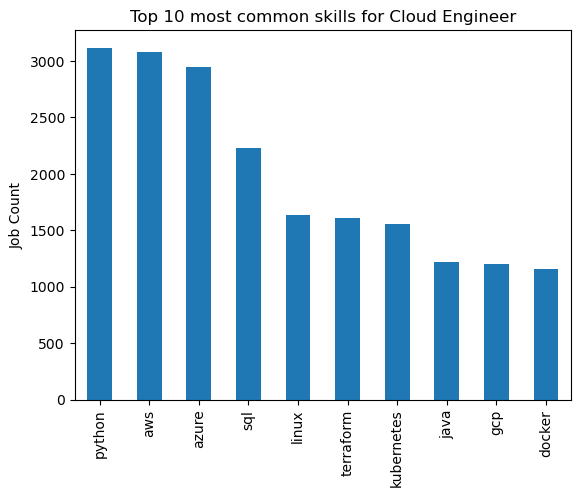

In [57]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_ce.explode('job_skills')
skills_count = df_exploded['job_skills'].value_counts().head(10)

skills_count.plot(kind = 'bar')
plt.title('Top 10 most common skills for Cloud Engineer')
plt.xlabel('')
plt.ylabel('Job Count')
plt.show()

In [73]:
df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head(10)

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526
240,watson,157102.290323
136,node,156697.295455
89,haskell,155757.666667
10,asp.net core,155000.000000
198,solidity,153639.950000


In [81]:
df_exploded = df.explode('job_skills')

unique_skill_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skill_count.columns = ['job_title', 'num_unique_skills']

unique_skill_count.head()

,job_title,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
